<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/R/Sesion6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**¿Cómo se desarrolla un Algoritmo de Kmeans?**


1.   Especificar el número de clusters "k" que se quieren crear
2.   Seleccionar de forma aleatoria k observaciones del set de datos como centroides iniciales
3. Para cada dato (observación) se calcula la suma de errores al cuadrado de esa observación respecto a cada uno de los "k-centroides"
4. Asignar cada una de las observaciones al centroide más cercano, es decir donde el error sea menor, ya que se busca minimizar la suma total de varianza interna
5. Para cada uno de los clusters "k" se recaclula su centroide
6. Los últimos dos pasos se repiten hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecidas.


In [ ]:
#Leer un archivo .csv, en este caso agregarmos la liga de github que contiene esta tabla y renombrarla como kdf
#Con la función "head" puedo dar un vistazo a los primeros datos de mi tabla y sus encabezados
kdf <- read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/K_Means_U.csv")
head(kdf)

,Temperatura,Velocidad,Elongacion,Diametro
,<int>,<int>,<dbl>,<dbl>
1,500,1600,3.4,0.4
2,520,1500,3.5,0.2
3,520,1400,3.4,0.2
4,470,1600,3.2,0.2
5,480,1600,3.1,0.2
6,540,1500,3.4,0.4


In [ ]:
#Como podemos ver en la data "kdf" la magnitud de los valores entre cada variable difieren significativamente, 
#Por lo que debemos escalarlas antes de aplicar clustering, esto se hará a través de la función "scale"
kdf2 <- scale(kdf)
head(kdf2)

Temperatura,Velocidad,Elongacion,Diametro
-1.0184372,-1.223442,0.7979809,-1.046525
-0.7769106,-1.280118,1.0286113,-1.308593
-0.7769106,-1.336794,0.7979809,-1.308593
-1.3807271,-1.223442,0.3367203,-1.308593
-1.2599638,-1.223442,0.1060900,-1.308593
-0.5353840,-1.280118,0.7979809,-1.046525


In [ ]:
#Vamos a utilizar los paquetes y librerías llamadas "ggplot2" y "factoextra" para hacer uso de la función "Fviz_nbclust"
install.packages("factoextra")
install.packages("ggplot2")
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



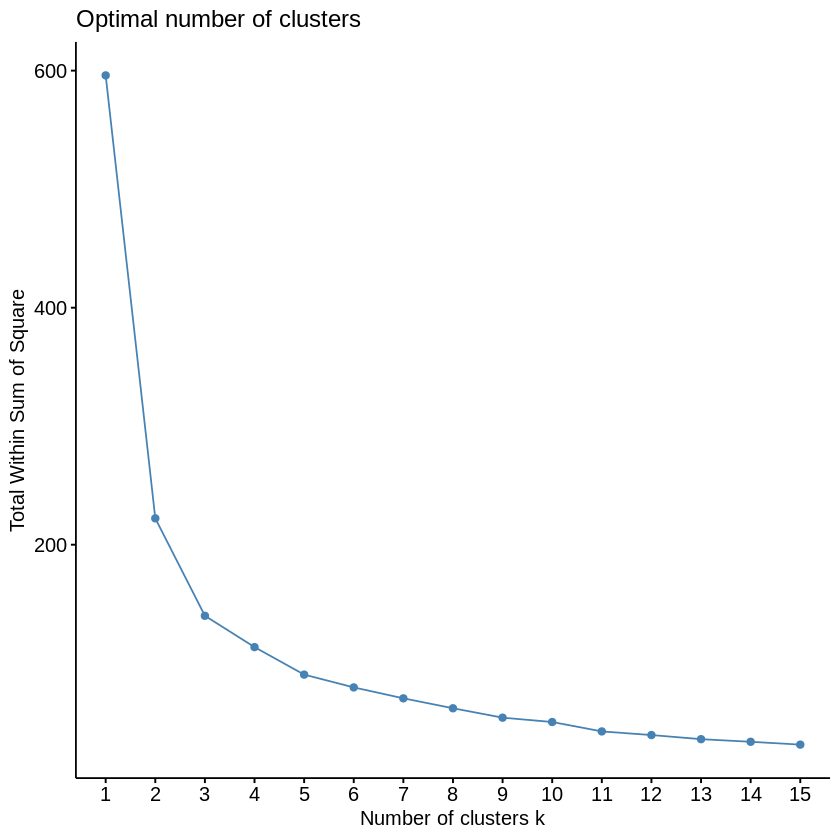

In [ ]:
#Antes de hacer el modelo de Clustering debemos obtner el número óptimo de clusters "k" 
#La función "fviz_nbclust" nos permite identificar el valor de "k" a partir del cual ocurre la reducción en la suma total de la varianza intra-cluster
#Este método se conoce, como el método "del codo"
#Además utilizamos el método de la distancia "Euclidean" (La raiz cuadrada de la suma de los cuadrados de las diferencias de las coordenadas)
#Sugiero pongamos un número de cluster máximo "k max" de 15 (si elegimos un número mayor, más iteraciones tendremos que hacer)
#Y "nstart" que indica el número de veces que se va a repetir el proceso, este número se recomienda que sea entre 25-50
fviz_nbclust(x = kdf2, FUNcluster = kmeans, method = "wss", k.max = 15, 
             diss = get_dist(kdf2, method = "euclidean"), nstart = 50)

De la gráfica anterior, podemos concluir que a partir de 3 clusters se reduce y estabiliza sustancialmente la suma total de los cuadrados internos. Por ello, podemos ver que para k=3 o K=4 podemos obtener un buen modelo de Clustering

# **Ahora hagamos el algoritmo para K=3**

In [ ]:
#Ahora iniciemos con el Modelo Kmeans para k=3 (3 cluster):
#Primero "sembramos" o dicho de otra forma, hacemos una colocación inicial de puntos en centroides potenciales (clusters k)
#Center es para indicar el número de cluster y ya hablamos de la funcionalidad de nstart
set.seed(101)
M_Cluster <- kmeans(kdf2, center=3, nstart = 20)
M_Cluster

K-means clustering with 3 clusters of sizes 50, 47, 53

Cluster means:
  Temperatura  Velocidad Elongacion   Diametro
1 -1.01119138 -1.3005215  0.8394944 -1.2509379
2  1.13217737  0.9929445  0.0962759  1.0137756
3 -0.05005221  0.3463713 -0.8773526  0.2811215

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3
 [38] 3 3 2 3 3 3 3 2 3 3 3 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 2 3 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 3 3 2 2
[112] 2 3 2 2 2 3 2 2 2 3 2 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 48.15831 47.60995 44.25778
 (between_SS / total_SS =  76.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

**En el resultado anterior podemos ver:**

*   El tamaño de cada uno de los 3 clusters
*   El promedio de cada una de las variables de mi data en cada uno de los 3 clusters
*   Como se fue dando la distribución de los grupos o dicho de otra manera, se indica a que cluster se ha asignado cada una de las observaciones
*   La suma de los cuadrados internos de cada cluster: la suma de las distancias euclideanas al cuadrado entre cada observación (xi) y el centroide de su cluster
*   La suma de los cuadrados entre clusters (between_SS)
*   La suma de los cuadrados totales (total_SS)
*   El ratio que nos indica el % de la varianza explicada por el modelo respecto al total de varianza observada 

In [ ]:
#Instalo el paquete "cluster" y mando llamar la librería con el mismo nombre para poder hacer la visualización de los clusters.
install.packages("cluster")
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



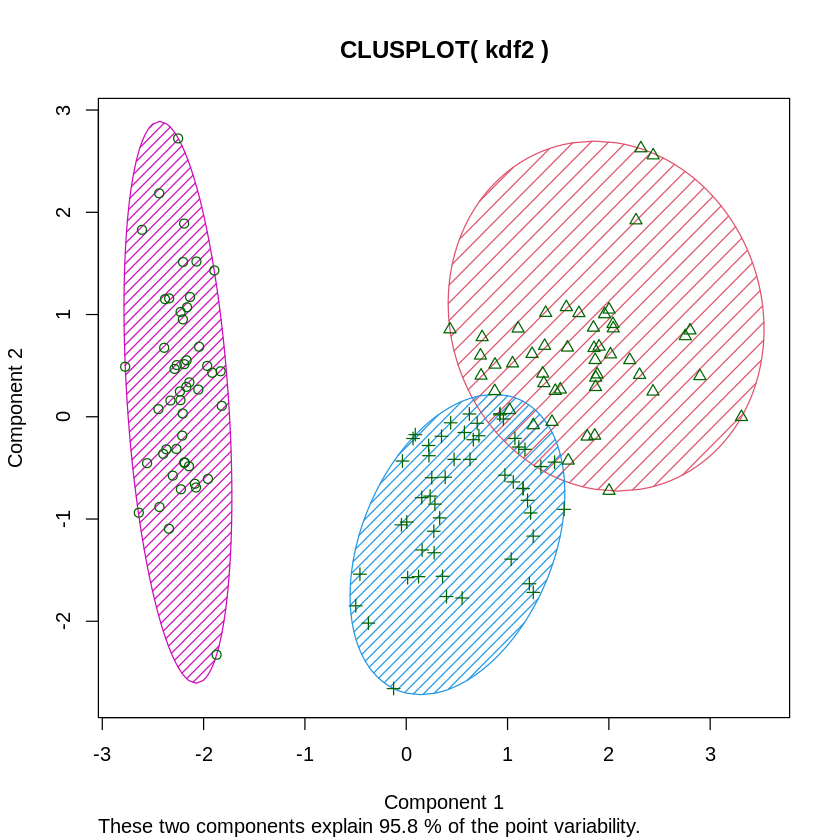

In [ ]:
#Utilizo la función clusplot para poder visualizar los clusters (M_Cluster$cluster) que nacen de la data "kdf2"  y le doy un poco de formato:
clusplot(kdf2, M_Cluster$cluster, color = T, shade = T, labels = 0, lines = 0)

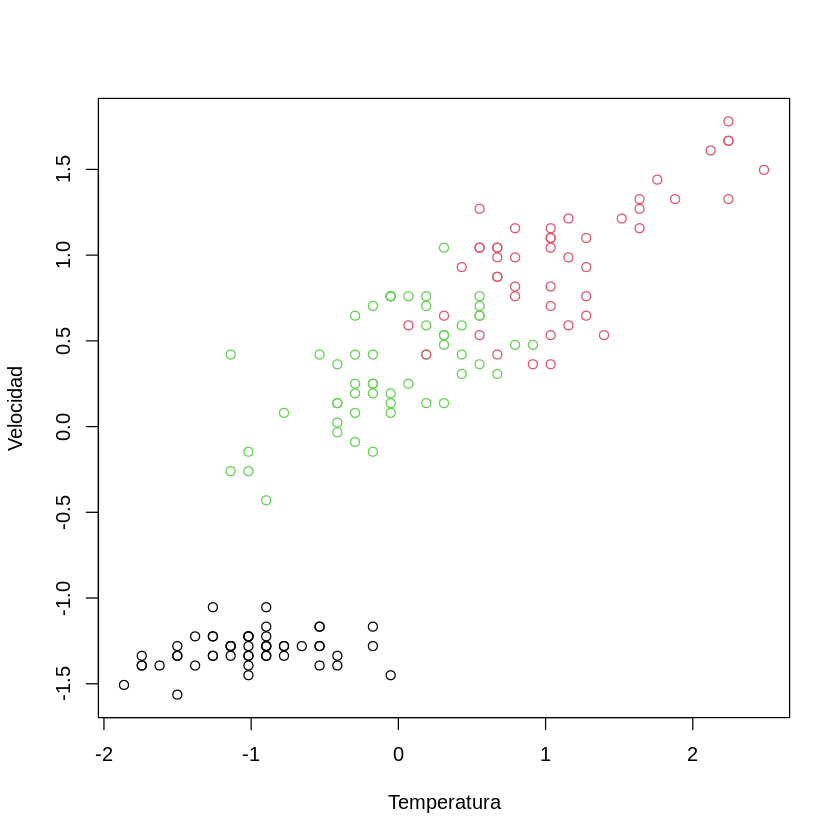

In [ ]:
#Para saber cuales son esos dos Componentes (variables) que explican el 95.8% de la variabilidad, 
#Utilizo la función plot para visualizar los datos de la tabla kfd2 con el algoritmo de Cluster implementado
#finalmente en el gráfico podemos ver cuales son estos 2 componentes (variables) 
plot(kdf2, col = M_Cluster$cluster)

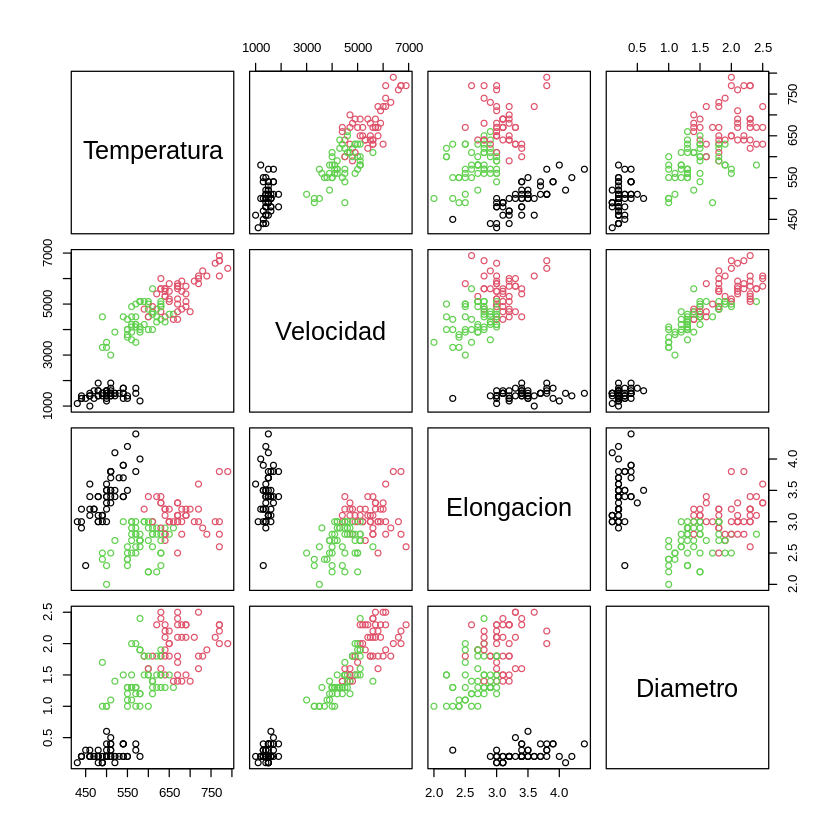

In [ ]:
#Si queremos visualizar por par de variables como se da el comportamiento (Clustering) 
#Usamos igualmente la función de plot, pero en lugar de tomar el dataset de kfd2, tomamos el original (antes de estandarizar)
plot(kdf, col = M_Cluster$cluster)

# **Repetimos los pasos pero ahora para K=4 para ver cual nos da mejor performance**

In [ ]:
set.seed(101)
M_Cluster2 <- kmeans(kdf2, center=4, nstart = 20)
M_Cluster2

K-means clustering with 4 clusters of sizes 53, 24, 47, 26

Cluster means:
  Temperatura  Velocidad Elongacion   Diametro
1 -0.05005221  0.3463713 -0.8773526  0.2811215
2 -0.70143351 -1.2966486  1.5283103 -1.2048576
3  1.13217737  0.9929445  0.0962759  1.0137756
4 -1.29712172 -1.3040964  0.2036643 -1.2934735

Clustering vector:
  [1] 4 2 2 4 4 2 2 2 4 4 2 4 4 4 2 4 4 2 2 4 2 4 2 4 3 3 3 1 1 1 3 1 1 1 1 1 1
 [38] 1 1 3 1 1 1 1 3 1 1 1 1 3 3 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 3 1 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 3 3 3 3 3 3 1 1 3 3
[112] 3 1 3 3 3 1 3 3 3 1 3 3 1 2 4 4 4 2 2 4 4 4 4 2 4 4 4 2 2 2 2 2 2 2 2 2 4
[149] 4 4

Within cluster sum of squares by cluster:
[1] 44.257784 11.929538 47.609950  9.803125
 (between_SS / total_SS =  80.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [ ]:
table(M_Cluster2$cluster)


 1  2  3  4 
53 24 47 26 

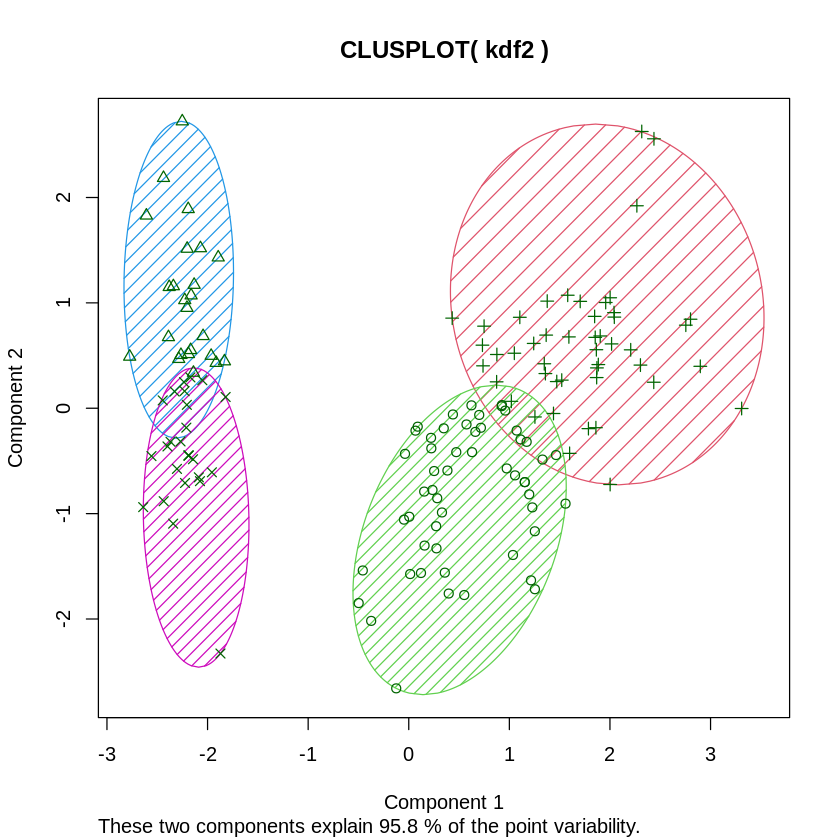

In [ ]:
clusplot(kdf2, M_Cluster2$cluster, color = T, shade = T, labels = 0, lines = 0)

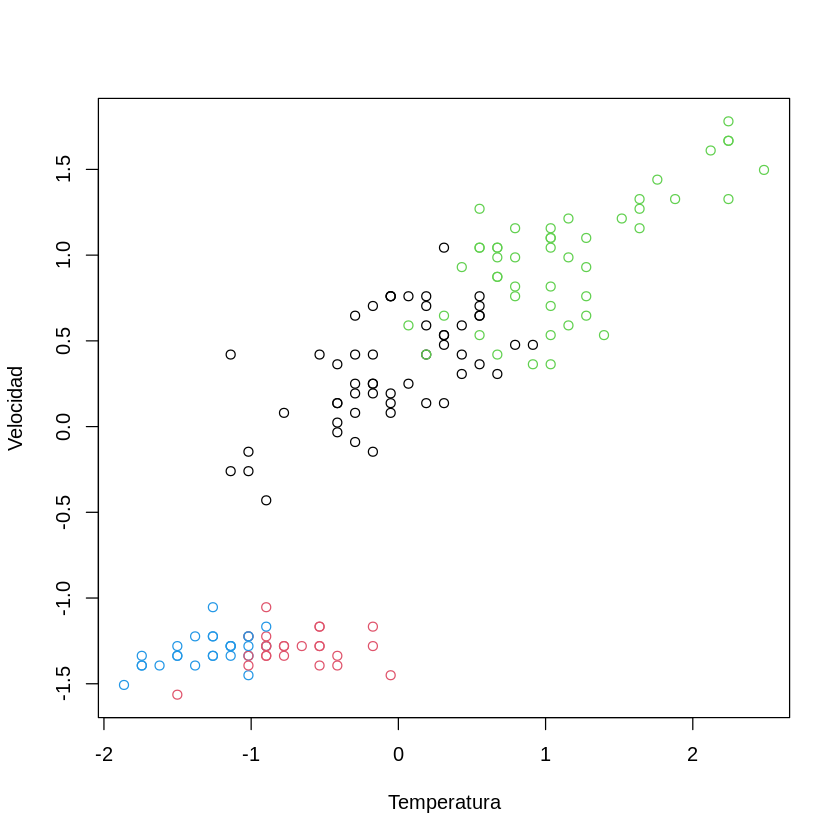

In [ ]:
plot(kdf2, col = M_Cluster2$cluster)

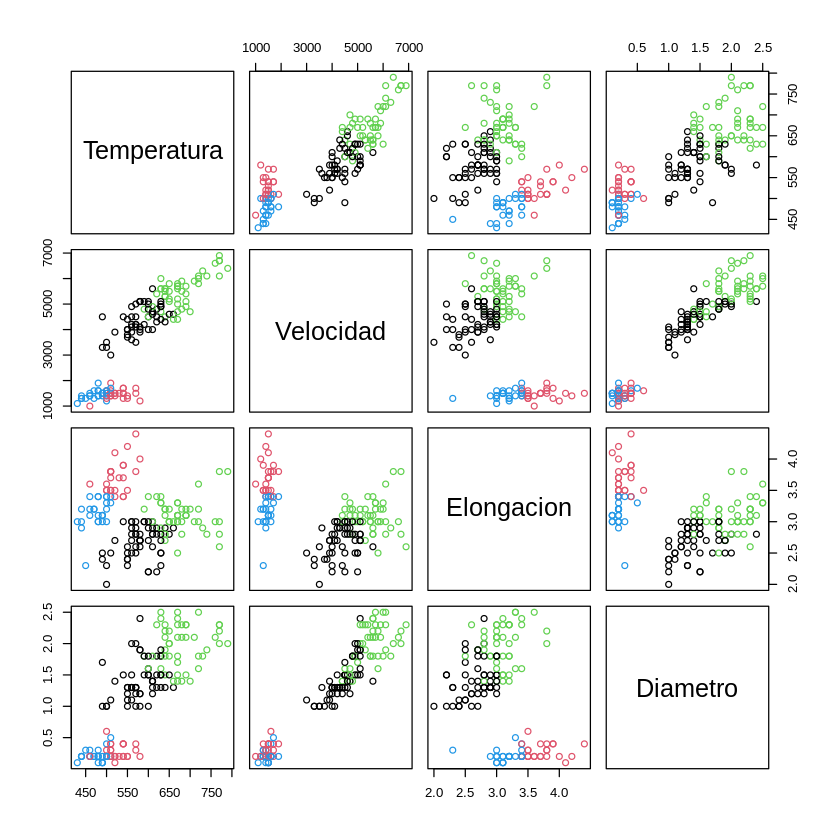

In [ ]:
plot(kdf, col = M_Cluster2$cluster)